In [1]:
!pip install scikit-plot

In [2]:
!pip3 install catboost

     |████████████████████████████████| 65.7MB 52kB/s 


In [3]:
!pip install eli5

     |████████████████████████████████| 112kB 6.1MB/s 


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import scikitplot as skplt
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import catboost as ctb
from scikitplot.estimators import plot_learning_curve

from collections import Counter

from sklearn import utils
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,  GroupKFold, cross_val_score, cross_validate, cross_val_predict
from scikitplot.metrics import plot_confusion_matrix, plot_calibration_curve

import gc
import eli5
from eli5.sklearn import PermutationImportance

import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
cd '/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales'

/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales


In [6]:
train = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales/sales_train.csv').reset_index(drop=True)
test = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales/test.csv').reset_index(drop=True)
shops = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales/shops.csv').reset_index(drop=True)
items = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales/items.csv').reset_index(drop=True)
categories = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Predict Future Sales/item_categories.csv').reset_index(drop=True)

## **Shops DB preprocessing**

In [7]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
shops.shop_name.unique()

array(['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
       'Интернет-магазин ЧС', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Коломна ТЦ "Рио"', 'Красноярск ТЦ "Взлетка Плаза"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва "Распродажа"', 'Москва МТРЦ "Афи Молл"',
       'Москва Магазин С21', 'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва Т

In [9]:
# extract the city name
shops["city"] = shops["shop_name"].apply(lambda s: s.split()[0])
shops["city_id"] = LabelEncoder().fit_transform(shops['city'])

#remove city name from shop name
f = lambda x: x["shop_name"].split(" ",1)[1]
shops["shop_name_clean"] = shops.apply(f, axis=1)


In [10]:
shops.head()

,shop_name,shop_id,city,city_id,shop_name_clean
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0,"Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0,"ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1,"ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2,"ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3,"ТЦ ""Волга Молл"""


# **Category DB preprocessing**

In [11]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
categories.item_category_name.unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [13]:
#add new feature - is_PS, is_XBOX
categories["is_PS"] = categories["item_category_name"].str.contains("- PS")
categories["is_XBOX"] = categories["item_category_name"].str.contains("XBOX")

# **Items DB preprocessing**

In [14]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [15]:
items.item_name.unique()

array(['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
       '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
       '***В ЛУЧАХ СЛАВЫ   (UNV)                    D', ...,
       'Язык запросов 1С:Предприятия 8 (+CD). Хрусталева Е.Ю.',
       'Яйцо для Little Inu', 'Яйцо дракона (Игра престолов)'],
      dtype=object)

In [16]:
items_per_category = (items[ ["item_category_id", "item_id"] ]
        .groupby(["item_category_id"])
        .agg(lambda x: len(set(x)) )
        .reset_index()
        .rename(columns={"item_id": "items_per_category"}))
 
items_per_category

,item_category_id,items_per_category
0,0,4
1,1,2
2,2,75
3,3,34
4,4,15
...,...,...
79,79,1
80,80,6
81,81,7
82,82,8


In [17]:
items_all = pd.merge(items, items_per_category, left_on = "item_category_id", right_on = "item_category_id")
items_all

,item_name,item_id,item_category_id,items_per_category
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,5035
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,5035
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,5035
3,***КОРОБКА (СТЕКЛО) D,4,40,5035
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,5035
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,15
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,15
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,15
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,15


# **Merge all DBs**

In [18]:
df_all = pd.concat([train, test], sort=False)
df_all = pd.merge(df_all, items_all, left_on = "item_id", right_on = "item_id")
df_all = pd.merge(df_all, categories, left_on = "item_category_id", right_on = "item_category_id")
df_all = pd.merge(df_all, shops, left_on = "shop_id", right_on = "shop_id")
df_all.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_name,item_category_id,items_per_category,item_category_name,is_PS,is_XBOX,shop_name,city,city_id,shop_name_clean
1734174,19.02.2015,25.0,58,3676,522.225,2.0,NaN,Gears of War 3 Xbox 360 PL/RU PAL DVD (D9D-00...,23,501,Игры - XBOX 360,False,True,"Якутск ТЦ ""Центральный""",Якутск,30,"ТЦ ""Центральный"""
794167,16.02.2013,1.0,31,8438,299.000,1.0,NaN,Агата Кристи. Только лучшее (mp3-CD) (Jewel),57,427,Музыка - MP3,False,False,"Москва ТЦ ""Семеновский""",Москва,14,"ТЦ ""Семеновский"""
3111655,04.01.2014,12.0,17,1007,599.000,1.0,NaN,3D Crystal Puzzle Замок XL,67,394,Подарки - Развитие,False,False,"Красноярск ТЦ ""Взлетка Плаза""",Красноярск,12,"ТЦ ""Взлетка Плаза"""
3037833,02.01.2014,12.0,29,19065,399.000,1.0,NaN,СТАЛИНГРАД,40,5035,Кино - DVD,False,False,"Москва ТЦ ""Новый век"" (Новокосино)",Москва,14,"ТЦ ""Новый век"" (Новокосино)"
410137,16.02.2014,13.0,6,8412,1399.000,1.0,NaN,АУКЦЫОН Птица LP,58,790,Музыка - Винил,False,False,"Воронеж (Плехановская, 13)",Воронеж,5,"(Плехановская, 13)"


In [19]:
items_per_shops = (df_all[ ["shop_id", "item_id"] ]
        .groupby(["shop_id"])
        .agg(lambda x: len(set(x)) )
        .reset_index()
        .sort_values(by="item_id", ascending=False)
        .rename(columns={"item_id": "items_per_shops"}))


items_per_shops["cumsum"] = items_per_shops["items_per_shops"].cumsum()
items_per_shops

,shop_id,items_per_shops,cumsum
25,25,16454,16454
31,31,15594,32048
28,28,14052,46100
57,57,13963,60063
54,54,13863,73926
6,6,13494,87420
42,42,13430,100850
56,56,12980,113830
21,21,11964,125794
16,16,11692,137486


In [20]:
category_per_shops = (df_all[ ["shop_id", "item_category_id"] ]
        .groupby(["shop_id"])
        .agg(lambda x: len(set(x)) )
        .reset_index()
        .rename(columns={"item_category_id": "category_per_shops"}))
 
category_per_shops

,shop_id,category_per_shops
0,0,48
1,1,41
2,2,72
3,3,70
4,4,73
5,5,72
6,6,75
7,7,72
8,8,43
9,9,38


In [21]:
def counter2(vals):
        cntr = Counter()
        cntr.update(vals)
        return cntr
 
import operator

all_category_per_shops = (df_all[ ["shop_id", "item_category_id", "item_id"] ]
        .groupby(["shop_id"])
        .agg(
            count_by_categories=("item_category_id", lambda x:  counter2(x) ),
            mean_items=("item_id", np.mean),
            # shopid=("shop_id",)
            #top_item=(max(count_by_categories.iteritems(), key = lambda p: p[1]))
            #worst_item=("item_id", np.min))
        ))
#stats = all_category_per_shops["count_by_categories"]
#all_category_per_shops['top category'] = max(stats.iteritems(), key = lambda p: p[1])
all_category_per_shops
#all_category_per_shops2 = all_category_per_shops["count_by_categories"].apply(pd.Series).fillna(-1)
#all_category_per_shops2.columns = ["category_{}".format(x) for x in all_category_per_shops2.columns]

#all_category_per_shops2.head(5)

,count_by_categories,mean_items
shop_id,,
0,"{37: 576, 56: 4, 59: 103, 55: 889, 23: 471, 19...",10633.221163
1,"{37: 192, 58: 1, 56: 2, 55: 537, 23: 270, 19: ...",10734.479218
2,"{37: 1341, 58: 244, 56: 45, 59: 5, 55: 979, 23...",8953.587083
3,"{37: 1442, 58: 231, 56: 51, 59: 2, 55: 3535, 2...",9332.524615
4,"{37: 1720, 58: 276, 56: 69, 59: 77, 55: 5599, ...",9413.133658
5,"{37: 2338, 58: 234, 56: 74, 59: 17, 55: 5490, ...",10223.916403
6,"{37: 7151, 58: 2049, 56: 642, 59: 514, 55: 124...",10000.691909
7,"{37: 3030, 58: 268, 56: 95, 59: 22, 55: 7558, ...",9808.750332
8,"{37: 115, 58: 20, 56: 16, 59: 46, 55: 468, 23:...",10038.579426


In [25]:
all_category_per_shops2 = all_category_per_shops["count_by_categories"].apply(pd.Series).fillna(-1)
all_category_per_shops2.columns = ["category_{}".format(x) for x in all_category_per_shops2.columns]

all_category_per_shops2.head(5)

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20,category_21,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,category_35,category_36,category_37,category_38,category_39,...,category_44,category_45,category_46,category_47,category_48,category_49,category_50,category_51,category_52,category_53,category_54,category_55,category_56,category_57,category_58,category_59,category_60,category_61,category_62,category_63,category_64,category_65,category_66,category_67,category_68,category_69,category_70,category_71,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83
shop_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,93.0,35.0,35.0,60.0,116.0,-1.0,-1.0,-1.0,-1.0,39.0,-1.0,15.0,15.0,24.0,-1.0,-1.0,-1.0,631.0,-1.0,340.0,115.0,471.0,-1.0,39.0,-1.0,-1.0,267.0,18.0,1249.0,-1.0,-1.0,16.0,-1.0,17.0,-1.0,576.0,111.0,-1.0,...,-1.0,22.0,-1.0,-1.0,-1.0,14.0,-1.0,-1.0,-1.0,-1.0,-1.0,889.0,4.0,153.0,-1.0,103.0,11.0,-1.0,142.0,60.0,66.0,77.0,-1.0,128.0,-1.0,28.0,16.0,2.0,25.0,20.0,-1.0,252.0,-1.0,104.0,-1.0,-1.0,-1.0,34.0,69.0,48.0
1,-1.0,-1.0,58.0,15.0,23.0,24.0,57.0,-1.0,-1.0,-1.0,-1.0,16.0,-1.0,4.0,6.0,21.0,-1.0,-1.0,-1.0,293.0,-1.0,265.0,66.0,270.0,-1.0,40.0,-1.0,-1.0,158.0,6.0,843.0,-1.0,-1.0,12.0,-1.0,9.0,-1.0,192.0,57.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,537.0,2.0,-1.0,1.0,-1.0,-1.0,-1.0,93.0,42.0,50.0,42.0,-1.0,75.0,-1.0,23.0,10.0,-1.0,9.0,14.0,-1.0,121.0,-1.0,61.0,-1.0,-1.0,-1.0,17.0,59.0,41.0
2,1.0,-1.0,351.0,498.0,39.0,53.0,329.0,92.0,3.0,8.0,-1.0,123.0,140.0,12.0,26.0,95.0,38.0,10.0,-1.0,4118.0,1816.0,478.0,364.0,2796.0,347.0,242.0,2.0,1.0,1386.0,233.0,4171.0,277.0,21.0,148.0,5.0,282.0,2.0,1341.0,531.0,2.0,...,7.0,39.0,-1.0,174.0,-1.0,350.0,-1.0,-1.0,-1.0,-1.0,38.0,979.0,45.0,131.0,244.0,5.0,8.0,264.0,138.0,724.0,439.0,339.0,-1.0,313.0,-1.0,311.0,408.0,569.0,627.0,185.0,1.0,527.0,61.0,49.0,49.0,162.0,-1.0,2.0,42.0,38.0
3,1.0,-1.0,211.0,375.0,28.0,111.0,253.0,84.0,35.0,8.0,-1.0,49.0,89.0,6.0,43.0,36.0,35.0,1.0,-1.0,2704.0,1235.0,446.0,390.0,2315.0,296.0,159.0,2.0,1.0,1582.0,152.0,4264.0,277.0,58.0,119.0,5.0,325.0,2.0,1442.0,296.0,-1.0,...,7.0,36.0,-1.0,156.0,-1.0,171.0,-1.0,-1.0,-1.0,-1.0,38.0,3535.0,51.0,114.0,231.0,2.0,17.0,169.0,84.0,552.0,313.0,395.0,-1.0,164.0,-1.0,268.0,326.0,463.0,606.0,81.0,1.0,196.0,61.0,28.0,49.0,180.0,44.0,-1.0,-1.0,40.0
4,1.0,-1.0,313.0,348.0,91.0,160.0,331.0,71.0,2.0,8.0,-1.0,105.0,143.0,17.0,57.0,119.0,33.0,8.0,-1.0,3016.0,1012.0,673.0,349.0,2760.0,250.0,309.0,2.0,1.0,2695.0,151.0,7811.0,277.0,58.0,185.0,5.0,377.0,2.0,1720.0,650.0,-1.0,...,7.0,42.0,-1.0,172.0,-1.0,141.0,-1.0,-1.0,3.0,-1.0,38.0,5599.0,69.0,228.0,276.0,77.0,16.0,192.0,298.0,736.0,460.0,409.0,-1.0,456.0,-1.0,244.0,352.0,687.0,661.0,106.0,1.0,764.0,61.0,119.0,49.0,303.0,2.0,25.0,208.0,55.0


In [27]:
df_all = pd.merge(df_all, items_per_shops, left_on = "shop_id", right_on = "shop_id")
df_all = pd.merge(df_all, all_category_per_shops, left_on = "shop_id", right_on = "shop_id")

df_all

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_name,item_category_id,items_per_category,item_category_name,is_PS,is_XBOX,shop_name,city,city_id,shop_name_clean,items_per_shops,cumsum,count_by_categories,mean_items
0,02.01.2013,0.0,59,22154,999.000000,1.0,NaN,ЯВЛЕНИЕ 2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505
1,NaN,NaN,59,22154,NaN,NaN,150983.0,ЯВЛЕНИЕ 2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505
2,26.04.2013,3.0,59,944,150.000000,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505
3,26.06.2013,5.0,59,944,199.500000,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505
4,20.07.2013,6.0,59,944,199.500000,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150044,01.10.2015,33.0,20,8548,1199.000000,2.0,NaN,Артбук Мир игры Dead Space,42,12,"Книги - Артбуки, энциклопедии",False,False,"Москва ""Распродажа""",Москва,14,"""Распродажа""",746,526549,"{67: 10, 62: 5, 69: 140, 65: 2, 64: 5, 63: 256...",16804.632254
3150045,04.10.2015,33.0,20,8547,1199.000000,3.0,NaN,Артбук Мир игры Assassin`s Creed IV Black Flag,42,12,"Книги - Артбуки, энциклопедии",False,False,"Москва ""Распродажа""",Москва,14,"""Распродажа""",746,526549,"{67: 10, 62: 5, 69: 140, 65: 2, 64: 5, 63: 256...",16804.632254
3150046,01.10.2015,33.0,20,8547,1199.000000,2.0,NaN,Артбук Мир игры Assassin`s Creed IV Black Flag,42,12,"Книги - Артбуки, энциклопедии",False,False,"Москва ""Распродажа""",Москва,14,"""Распродажа""",746,526549,"{67: 10, 62: 5, 69: 140, 65: 2, 64: 5, 63: 256...",16804.632254
3150047,02.10.2015,33.0,20,8547,1199.000000,4.0,NaN,Артбук Мир игры Assassin`s Creed IV Black Flag,42,12,"Книги - Артбуки, энциклопедии",False,False,"Москва ""Распродажа""",Москва,14,"""Распродажа""",746,526549,"{67: 10, 62: 5, 69: 140, 65: 2, 64: 5, 63: 256...",16804.632254


In [28]:
def top_tem(n):
  return max(n.items(), key = lambda p: p[1])

df_all["top_category"] = [max(x.items(), key = lambda p: p[1])[0] for x in df_all.count_by_categories]
  #df_all["top"][x] = map(top_tem, df_all["count_by_categories"][x])
df_all.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_name,item_category_id,items_per_category,item_category_name,is_PS,is_XBOX,shop_name,city,city_id,shop_name_clean,items_per_shops,cumsum,count_by_categories,mean_items,top_category
513963,15.01.2013,0.0,15,2417,349.0,2.0,NaN,Counter Strike. Source (рус.в) (PC-DVD) (Jewel),30,756,Игры PC - Стандартные издания,False,False,"Калуга ТРЦ ""XXI век""",Калуга,10,"ТРЦ ""XXI век""",10639,281659,"{37: 5102, 58: 275, 56: 130, 59: 32, 55: 7096,...",9690.755475,40
1356235,13.02.2014,13.0,51,12600,72.0,1.0,NaN,КНИГА ДЖУНГЛЕЙ М/Ф (регион),40,5035,Кино - DVD,False,False,"Тюмень ТЦ ""Зеленый Берег""",Тюмень,25,"ТЦ ""Зеленый Берег""",8739,428655,"{37: 2421, 58: 1, 56: 31, 59: 1, 55: 5782, 23:...",11294.178606,40
3121660,27.06.2014,17.0,13,13888,249.0,1.0,NaN,ЛЕПС ГРИГОРИЙ Гангстер №1 (фирм.),55,2365,Музыка - CD локального производства,False,False,"Казань ТЦ ""Бехетле""",Казань,9,"ТЦ ""Бехетле""",4865,507402,"{37: 1095, 58: 5, 56: 19, 59: 129, 55: 3696, 2...",12419.826246,40
2650586,05.01.2013,0.0,53,5344,299.0,1.0,NaN,OST Tarantino Connection,55,2365,Музыка - CD локального производства,False,False,"Уфа ТЦ ""Семья"" 2",Уфа,26,"ТЦ ""Семья"" 2",9879,372153,"{37: 2489, 58: 270, 56: 149, 59: 3, 55: 9233, ...",9428.558126,55
596739,30.08.2014,19.0,7,17167,399.0,1.0,NaN,ПОДДУБНЫЙ,40,5035,Кино - DVD,False,False,"Воронеж ТРЦ ""Максимир""",Воронеж,5,"ТРЦ ""Максимир""",10644,271020,"{37: 3030, 58: 268, 56: 95, 59: 22, 55: 7558, ...",9808.750332,40
2725305,25.05.2015,28.0,52,2445,299.0,1.0,NaN,"Crysis 3 [PC, русская версия]",30,756,Игры PC - Стандартные издания,False,False,"Уфа ТК ""Центральный""",Уфа,26,"ТК ""Центральный""",10749,249648,"{37: 2515, 58: 295, 56: 129, 59: 169, 55: 5821...",9961.004629,40
2678930,26.06.2015,29.0,53,3340,1199.0,1.0,NaN,"FIFA 15 [PC, русская версия]",30,756,Игры PC - Стандартные издания,False,False,"Уфа ТЦ ""Семья"" 2",Уфа,26,"ТЦ ""Семья"" 2",9879,372153,"{37: 2489, 58: 270, 56: 149, 59: 3, 55: 9233, ...",9428.558126,55
2955987,25.10.2013,9.0,30,4249,839.3,1.0,NaN,Kinect Star Wars [только для Kinect] [Xbox 360],23,501,Игры - XBOX 360,False,True,"Москва ТЦ ""Перловский""",Москва,14,"ТЦ ""Перловский""",9512,410934,"{37: 2536, 58: 416, 56: 58, 59: 200, 55: 5602,...",10471.126878,40
2636561,17.07.2014,18.0,49,17869,499.0,1.0,NaN,РИО 1+2,40,5035,Кино - DVD,False,False,"Тюмень ТРЦ ""Кристалл""",Тюмень,25,"ТРЦ ""Кристалл""",6753,466435,"{37: 998, 58: 226, 56: 61, 55: 2496, 23: 1407,...",10304.998138,55
826857,31.05.2013,4.0,31,8820,69.0,1.0,NaN,БЕРСЕРК: Воздушная крепость: Бустер арт. 1979,65,163,Подарки - Настольные игры (компактные),False,False,"Москва ТЦ ""Семеновский""",Москва,14,"ТЦ ""Семеновский""",15594,32048,"{37: 15390, 58: 543, 56: 450, 59: 918, 55: 308...",11091.558242,40


In [29]:
df_all_categories = pd.merge(df_all, all_category_per_shops2, left_on = "shop_id", right_on = "shop_id")

df_all_categories.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_name,item_category_id,items_per_category,item_category_name,is_PS,is_XBOX,shop_name,city,city_id,shop_name_clean,items_per_shops,cumsum,count_by_categories,mean_items,top_category,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,...,category_44,category_45,category_46,category_47,category_48,category_49,category_50,category_51,category_52,category_53,category_54,category_55,category_56,category_57,category_58,category_59,category_60,category_61,category_62,category_63,category_64,category_65,category_66,category_67,category_68,category_69,category_70,category_71,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83
0,02.01.2013,0.0,59,22154,999.0,1.0,NaN,ЯВЛЕНИЕ 2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505,30,1.0,-1.0,231.0,403.0,52.0,56.0,257.0,96.0,27.0,8.0,-1.0,120.0,142.0,14.0,19.0,103.0,53.0,2.0,...,7.0,37.0,-1.0,167.0,-1.0,158.0,-1.0,-1.0,-1.0,-1.0,38.0,5313.0,89.0,132.0,262.0,18.0,15.0,232.0,388.0,1267.0,461.0,479.0,1.0,741.0,-1.0,416.0,615.0,761.0,552.0,128.0,1.0,788.0,61.0,20.0,49.0,206.0,12.0,-1.0,-1.0,351.0
1,NaN,NaN,59,22154,NaN,NaN,150983.0,ЯВЛЕНИЕ 2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505,30,1.0,-1.0,231.0,403.0,52.0,56.0,257.0,96.0,27.0,8.0,-1.0,120.0,142.0,14.0,19.0,103.0,53.0,2.0,...,7.0,37.0,-1.0,167.0,-1.0,158.0,-1.0,-1.0,-1.0,-1.0,38.0,5313.0,89.0,132.0,262.0,18.0,15.0,232.0,388.0,1267.0,461.0,479.0,1.0,741.0,-1.0,416.0,615.0,761.0,552.0,128.0,1.0,788.0,61.0,20.0,49.0,206.0,12.0,-1.0,-1.0,351.0
2,26.04.2013,3.0,59,944,150.0,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505,30,1.0,-1.0,231.0,403.0,52.0,56.0,257.0,96.0,27.0,8.0,-1.0,120.0,142.0,14.0,19.0,103.0,53.0,2.0,...,7.0,37.0,-1.0,167.0,-1.0,158.0,-1.0,-1.0,-1.0,-1.0,38.0,5313.0,89.0,132.0,262.0,18.0,15.0,232.0,388.0,1267.0,461.0,479.0,1.0,741.0,-1.0,416.0,615.0,761.0,552.0,128.0,1.0,788.0,61.0,20.0,49.0,206.0,12.0,-1.0,-1.0,351.0
3,26.06.2013,5.0,59,944,199.5,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505,30,1.0,-1.0,231.0,403.0,52.0,56.0,257.0,96.0,27.0,8.0,-1.0,120.0,142.0,14.0,19.0,103.0,53.0,2.0,...,7.0,37.0,-1.0,167.0,-1.0,158.0,-1.0,-1.0,-1.0,-1.0,38.0,5313.0,89.0,132.0,262.0,18.0,15.0,232.0,388.0,1267.0,461.0,479.0,1.0,741.0,-1.0,416.0,615.0,761.0,552.0,128.0,1.0,788.0,61.0,20.0,49.0,206.0,12.0,-1.0,-1.0,351.0
4,20.07.2013,6.0,59,944,199.5,1.0,NaN,2012 (BD),37,1780,Кино - Blu-Ray,False,False,"Ярославль ТЦ ""Альтаир""",Ярославль,31,"ТЦ ""Альтаир""",9923,352382,"{37: 3051, 58: 262, 56: 89, 59: 18, 55: 5313, ...",9961.222505,30,1.0,-1.0,231.0,403.0,52.0,56.0,257.0,96.0,27.0,8.0,-1.0,120.0,142.0,14.0,19.0,103.0,53.0,2.0,...,7.0,37.0,-1.0,167.0,-1.0,158.0,-1.0,-1.0,-1.0,-1.0,38.0,5313.0,89.0,132.0,262.0,18.0,15.0,232.0,388.0,1267.0,461.0,479.0,1.0,741.0,-1.0,416.0,615.0,761.0,552.0,128.0,1.0,788.0,61.0,20.0,49.0,206.0,12.0,-1.0,-1.0,351.0


In [30]:
import gc

del category_per_shops
del items_per_shops
del items_per_category
del train
del test

gc.collect()

678

# **Train models**

In [31]:
train2 = df_all[ ~df_all['item_cnt_day'].isnull() ].copy()
test2 = df_all[ df_all['item_cnt_day'].isnull() ].copy() 

In [32]:
import numpy as np
test2.ID = test2.ID.astype(np.int64)

In [34]:
test2.is_PS.astype('uint8')
test2.is_XBOX.astype('uint8')
train2.is_PS.astype('uint8')
train2.is_XBOX.astype('uint8')


0          0
2          0
3          0
4          0
5          0
          ..
3150044    0
3150045    0
3150046    0
3150047    0
3150048    0
Name: is_XBOX, Length: 2935849, dtype: uint8

In [35]:
def get_feats(df, black_list=[ 'date', 'date_block_num','item_price', 'ID', 'item_cnt_day', 'item_cnt_day_pred','city_id',  'most_revenue_shop','cumsum']):
    num_feats = df.select_dtypes(include = [np.number,np.bool]).columns
    return [x for x in num_feats if x not in black_list]


In [36]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [37]:
feats = get_feats(train2)
feats

['shop_id',
 'item_id',
 'item_category_id',
 'items_per_category',
 'is_PS',
 'is_XBOX',
 'items_per_shops',
 'mean_items',
 'top_category']

In [ ]:
#DecisionTreeClassifier
X = train2[ get_feats(train2) ].values
y = train2['item_cnt_day'].values
model = DecisionTreeRegressor(max_depth=10)
model.fit(X, y)
y_pred = model.predict(X)
mean_squared_error(y, y_pred, squared=False)

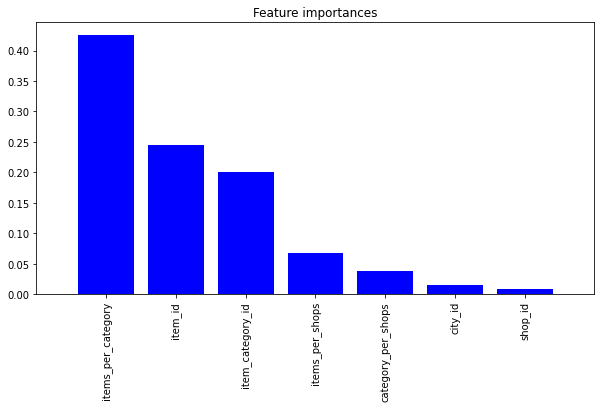

In [ ]:
draw_feature_importances(model, feats)

In [ ]:
#XGBClassifier
X = train2[ feats ].values
y = train2['item_cnt_day'].values
model_xgb = xgb.XGBRegressor(max_depth=10, n_estimators=100, random_state=0)
model_xgb.fit(X, y)
y_pred = model.predict(X)
mean_squared_error(y, y_pred, squared=False)

In [39]:
# split data into train and test sets
X = train2[ feats ].values
y = train2['item_cnt_day'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# fit model no training data
model_xgb = xgb.XGBRegressor(max_depth=10, n_estimators=100, random_state=0)
model_xgb.fit(X_train, y_train)
# make predictions for test data
y_pred = model_xgb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

[19:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.5504482056263695

Historical score:

xgb.XGBRegressor(max_depth=5, n_estimators=50, random_state=0)
rmse = 2.3854519295114085

xgb.XGBRegressor(max_depth=7, n_estimators=100, random_state=0) 
rmse 2.354281719580792

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
model_xgb = xgb.XGBRegressor(max_depth=10, n_estimators=100, random_state=0)
rmse = 



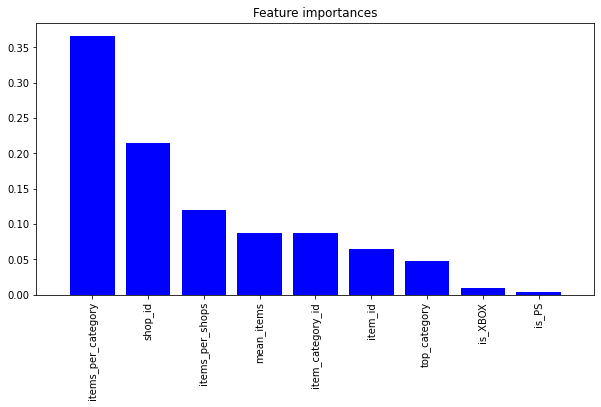

In [41]:
draw_feature_importances(model_xgb, feats)

In [ ]:
X_test = test2[ feats ].values
y_pred_test = model.predict(X_test)

In [ ]:
X_test2 = test2[ feats ].values
y_pred_test = model.predict(X_test2)
test2['item_cnt_month'] = y_pred_test.astype(np.int64)
test2[ ['ID', 'item_cnt_month'] ].to_csv('xgb_tt3.csv', index=False)

In [ ]:
import numpy as np
test2.ID = test2.ID.astype(np.int64)

In [ ]:
X = train2[ get_feats(df_all) ].values
y = train2['item_cnt_day'].values
model = ctb.CatBoostRegressor(max_depth=8, n_estimators=100, verbose=0, random_state=0, custom_metric='RMSE')
model.fit(X, y)
y_pred = model.predict(X)

mean_squared_error(y, y_pred, squared=False)


2.3728830097309275

In [ ]:
X_test = test2[ get_feats(df_all) ].values
y_pred_test = model.predict(X_test)

# **K-Fold**

In [ ]:
X = train2[ feats ].values
y = train2['item_cnt_day'].values

cv = KFold(n_splits=2, random_state=2018, shuffle=True)
model_xgb = xgb.XGBRegressor(max_depth=10, n_estimators=100, random_state=0)

scores = []
for train_idx, test_idx in cv.split(y):
    model_xgb.fit(X[train_idx], y[train_idx])
    y_pred = model_xgb.predict(X[test_idx])

    score = mean_squared_error(y[test_idx], y_pred , squared=False)
    scores.append(score)

print(np.mean(scores), np.std(scores))

In [44]:
X_test2 = test2[ feats ].values
y_pred_test = model_xgb.predict(X_test2)
test2['item_cnt_month'] = y_pred_test.astype(np.int64)
test2[ ['ID', 'item_cnt_month'] ].to_csv('xgb_strkfold.csv', index=False)

## **LGBM**

In [ ]:
X = train2[ get_feats(train2) ].values
y = train2['item_cnt_day'].values
model = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.03,
        num_leaves=32,
        colsample_bytree=0.9497036,
        subsample=0.8715623,
        max_depth=8,
        reg_alpha=0.04,
        reg_lambda=0.073,
        min_split_gain=0.0222415,
        min_child_weight=40)
model.fit(X, y)
y_pred = model.predict(X)
mean_squared_error(y, y_pred, squared=False)

2.4346136134065937

In [ ]:
X_test = test2[ feats ].values
y_pred_test = model.predict(X_test)
test2['item_cnt_month'] = y_pred_test.astype(np.int64)
test2[ ['ID', 'item_cnt_month'] ].to_csv('lgb.csv', index=False)